In [1]:
import pickle
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np

In [8]:
rcecollection = spike.EphysRecordingCollection(r'.\export\test_omission')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [3]:
label_timestamps = pickle.load(open('recording_to_label_to_timestamps 1.pkl', 'rb'))

In [9]:
for recording in rcecollection.collection.keys():
    # Check if the recording key (without the .rec suffix) is in label_timestamps
    recording_key_without_suffix = recording[:-4]  # Remove '.rec' from the end
    if recording_key_without_suffix in label_timestamps:
        # Assign the corresponding label_timestamps dictionary to event_dict
        rcecollection.collection[recording].event_dict = label_timestamps[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        # Find the positions of 'subj_' and '_t' to extract the subject
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        end = recording.find('_t', start)  # End index before '_t'
        subject = recording[start:end].replace('-', '_')  # Replace '-' with '_'
        
        # Assign the extracted subject
        rcecollection.collection[recording].subject = subject

In [10]:
spikeanal = spike.SpikeAnalysis_MultiRecording(rcecollection)

All set to analyze


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


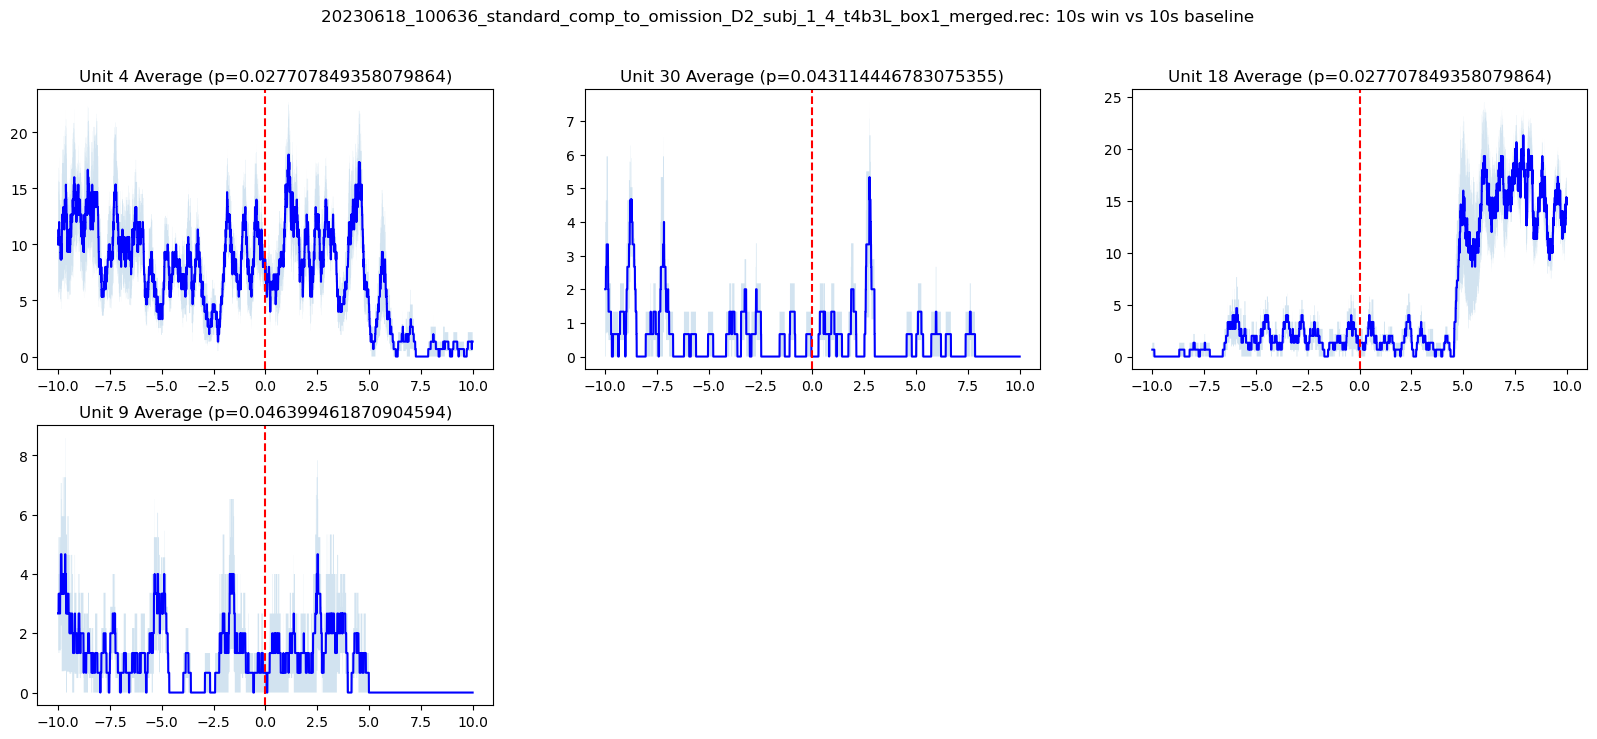

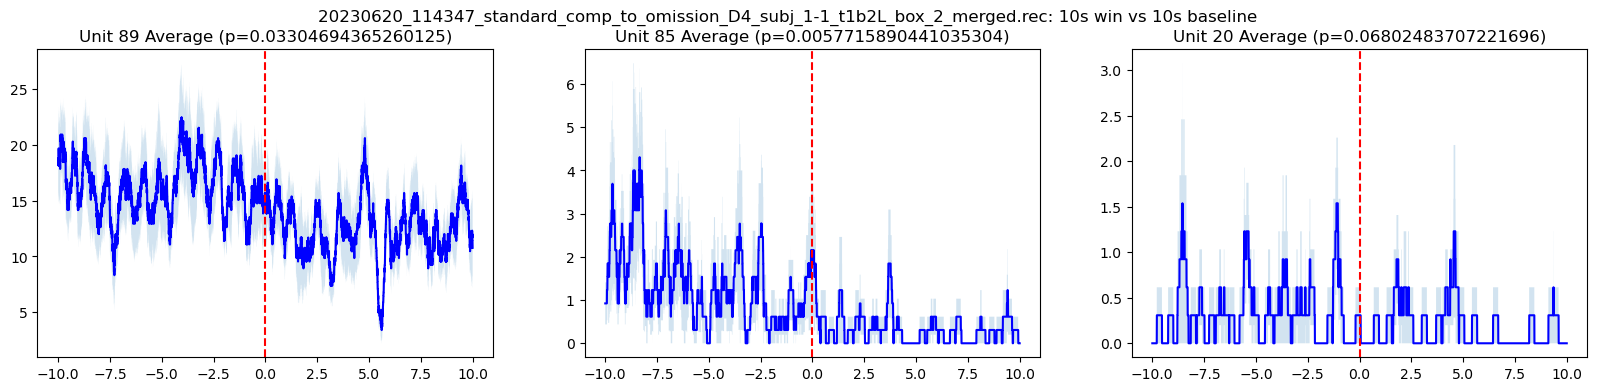

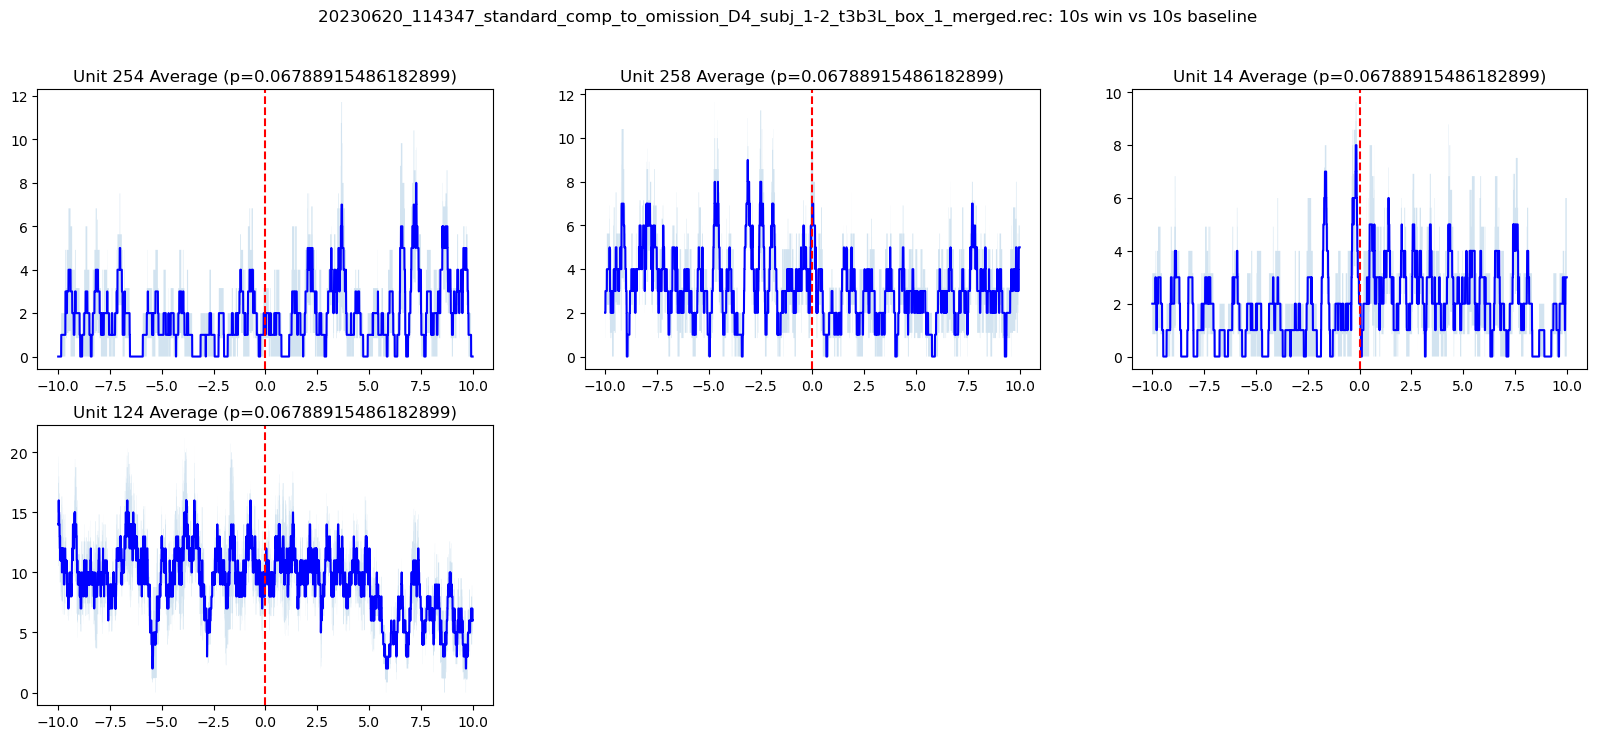

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                  7            6.0  0.345448  not significant   
1                 25            6.0  0.345448  not significant   
2                 38            4.0  0.172955  not significant   
3                  4            0.0  0.027708        decreases   
4                 42            5.0  0.248864  not significant   
5                 48            5.0  0.500184  not significant   
6                  2            6.0  0.344118  not significant   
7                 30            0.0  0.043114        decreases   
8                  1            6.0  0.345448  not significant   
9                 18            0.0  0.027708        decreases   
10                 9            1.0  0.046399        increases   
11                89           15.0  0.033047        increases   
12                64           23.0  0.115851  not significant   
13                94           30.0  0.789472  not significant   
14                93           33.0  0.636831  not significant   
15                60           32.0  0.345448  not significant   
16                90           24.5  0.449580  not significant   
17                22           28.5  0.233236  not significant   
18                57           26.0  0.172955  not significant   
19                85            6.0  0.005772        increases   
20                20           19.5  0.068025  not significant   
21                 2           23.5  0.223837  not significant   
22                34           18.0  0.592654  not significant   
23                42            5.0  1.000000  not significant   
24               207            3.0  0.465209  not significant   
25               220            4.0  0.715001  not significant   
26               144            1.0  0.144127  not significant   
27                41            3.0  0.465209  not significant   
28               162            4.0  0.715001  not significant   
29               203            0.0  0.157299  not significant   
30                48            5.0  1.000000  not significant   
31                45            1.0  0.144127  not significant   
32               259            5.0  1.000000  not significant   
33               153            4.0  0.715001  not significant   
34               254            0.0  0.067889  not significant   
35                53            3.0  0.465209  not significant   
36               168            1.0  0.144127  not significant   
37                58            5.0  1.000000  not significant   
38               258            0.0  0.067889  not significant   
39                14            0.0  0.067889  not significant   
40               241            5.0  1.000000  not significant   
41               245            4.0  0.715001  not significant   
42               181            1.0  0.144127  not significant   
43               251            4.0  0.715001  not significant   
44                43            1.0  0.144127  not significant   
45               124            0.0  0.067889  not significant   
46               139            3.0  1.000000  not significant   
47               221            4.0  0.715001  not significant   
48               172            1.5  0.414216  not significant   
49               244            4.0  0.715001  not significant   
50               227            5.0  1.000000  not significant   
51               226            3.0  0.465209  not significant   
52                50            0.0  0.179712  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_4   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_4   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_4   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_4   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_4   
5   20230618_100636_standard_comp_to_omission_D2_

In [11]:
spikeanal.wilcox_baseline_v_event_collection('win', 10, 10)

## Above was done on 3 recordings, all omission, 3 different subjects, but had zero unsorted spikes

## Below will test with an additional recording, subject 1_1 will now have 2 recordings, and the additional recording has 1 unsorted spike

In [12]:
rcecollection2 = spike.EphysRecordingCollection(r'.\export\test_omission')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [13]:
for recording in rcecollection2.collection.keys():
    # Check if the recording key (without the .rec suffix) is in label_timestamps
    recording_key_without_suffix = recording[:-4]  # Remove '.rec' from the end
    if recording_key_without_suffix in label_timestamps:
        # Assign the corresponding label_timestamps dictionary to event_dict
        rcecollection2.collection[recording].event_dict = label_timestamps[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        # Find the positions of 'subj_' and '_t' to extract the subject
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        end = recording.find('_t', start)  # End index before '_t'
        subject = recording[start:end].replace('-', '_')  # Replace '-' with '_'
        
        # Assign the extracted subject
        rcecollection2.collection[recording].subject = subject

In [23]:
spikeanal2 = spike.SpikeAnalysis_MultiRecording(rcecollection2)

All set to analyze


C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


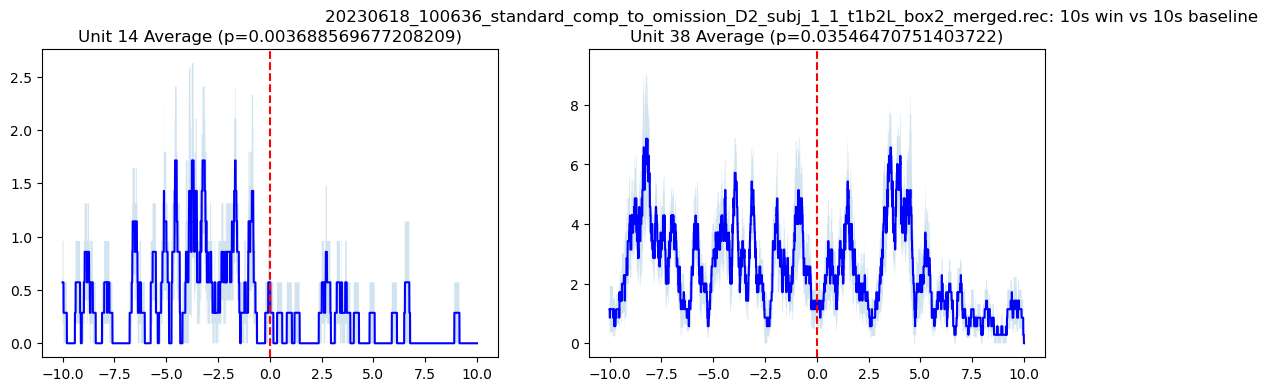

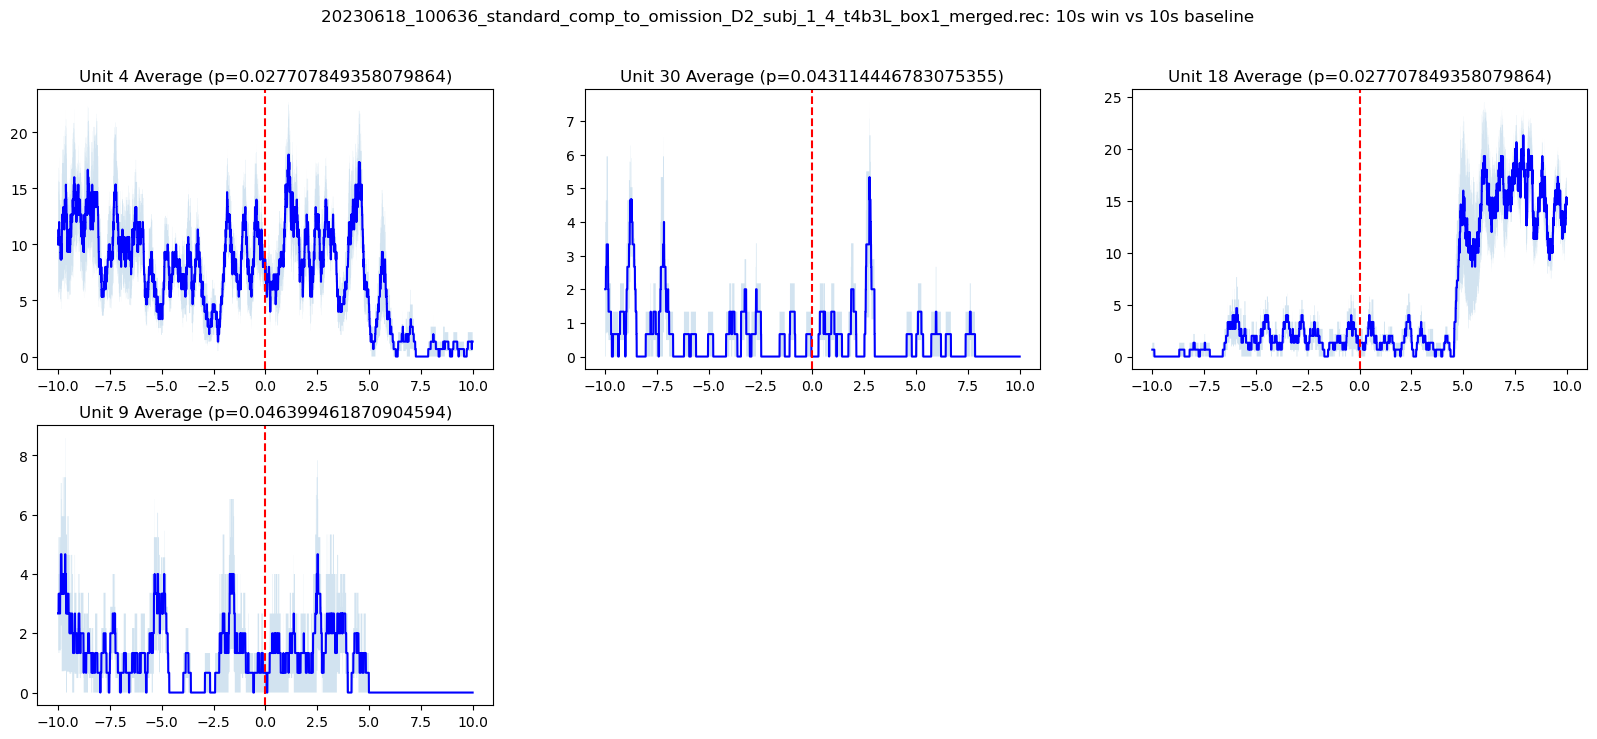

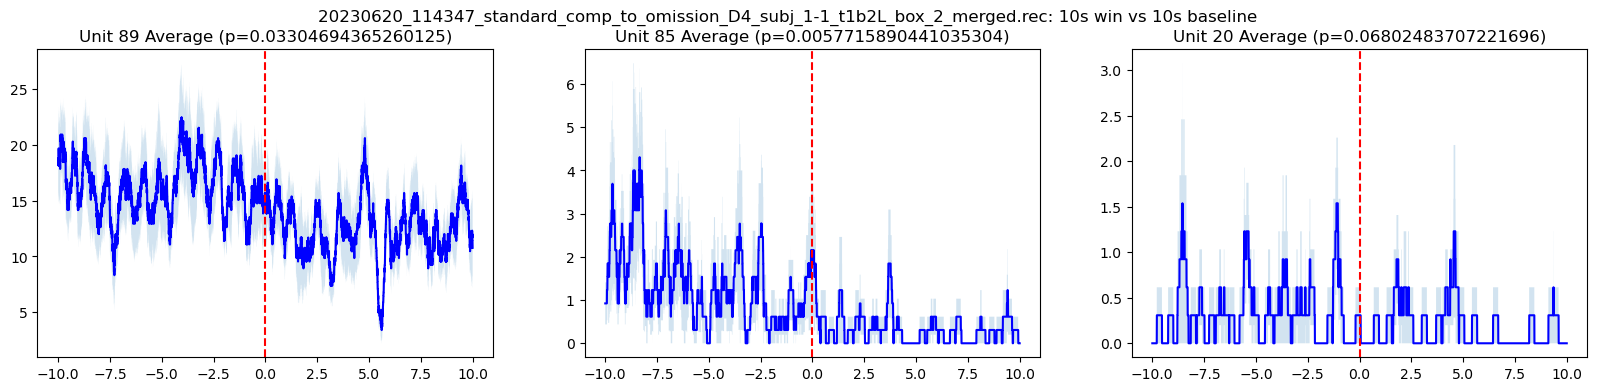

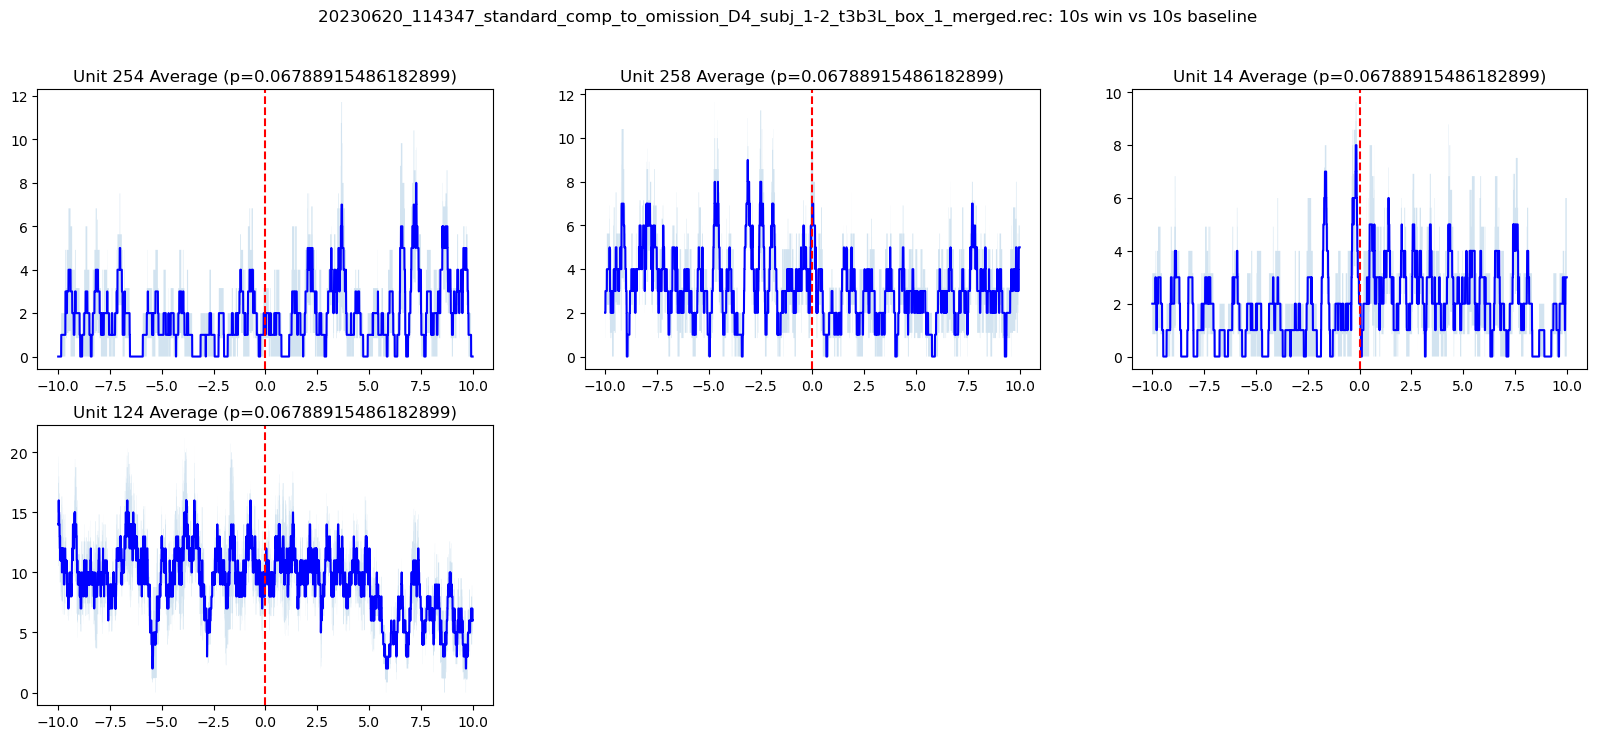

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20           43.0  0.550924  not significant   
1                 40           41.0  0.470338  not significant   
2                  7           35.0  0.271948  not significant   
3                  6           43.0  0.550924  not significant   
4                  8           43.0  0.550924  not significant   
..               ...            ...       ...              ...   
64               172            1.5  0.414216  not significant   
65               244            4.0  0.715001  not significant   
66               227            5.0  1.000000  not significant   
67               226            3.0  0.465209  not significant   
68                50            0.0  0.179712  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
..                                                ...     ...   
64  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
65  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
66  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
67  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
68  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                      Event  
0   10s win vs 10s baseline  
1   10s win vs 10s baseline  
2   10s win vs 10s baseline  
3   10s win vs 10s baseline  
4   10s win vs 10s baseline  
..                      ...  
64  10s win vs 10s baseline  
65  10s win vs 10s baseline  
66  10s win vs 10s baseline  
67  10s win vs 10s baseline  
68  10s win vs 10s baseline  

[69 rows x 7 columns]

In [20]:
spikeanal2.wilcox_baseline_v_event_collection('win', 10, 10)

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


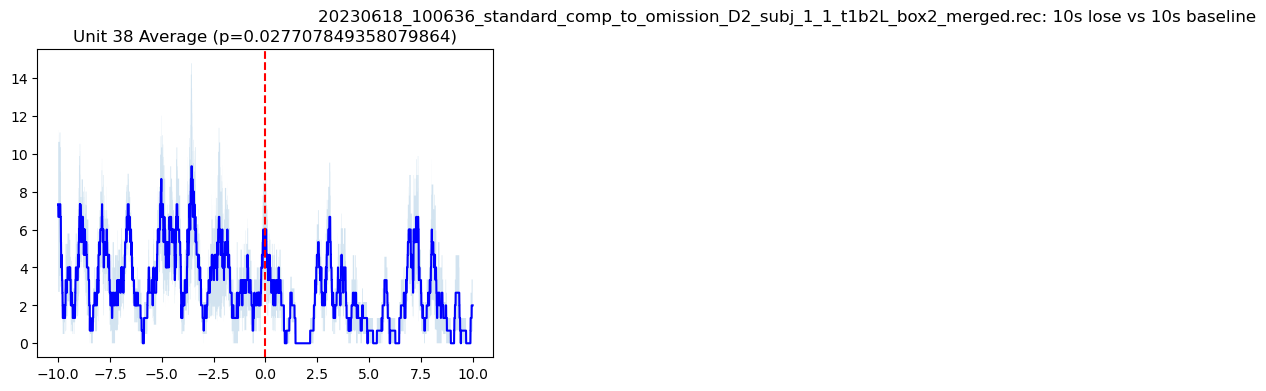

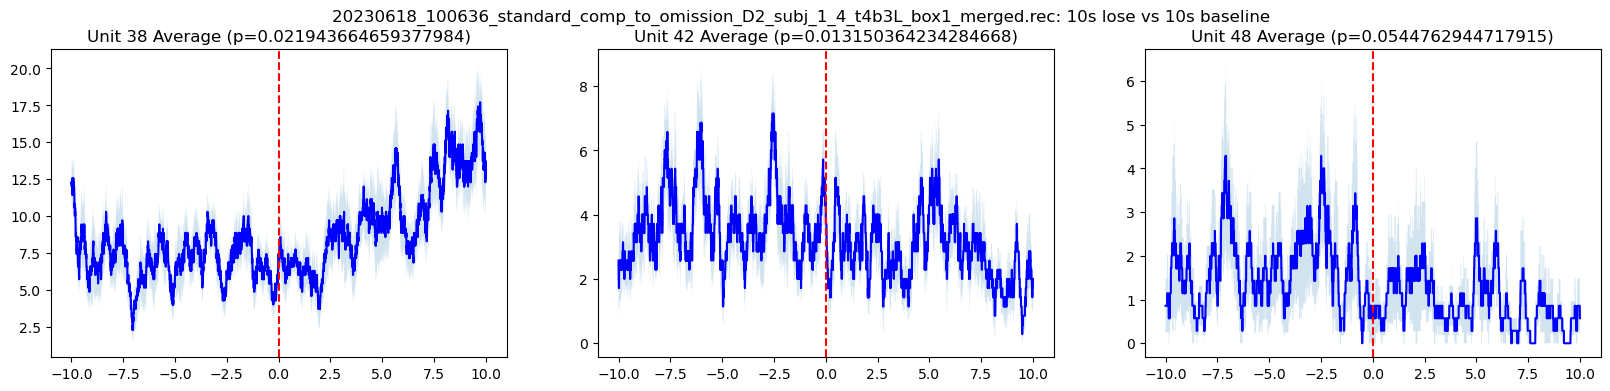

<Figure size 2000x0 with 0 Axes>

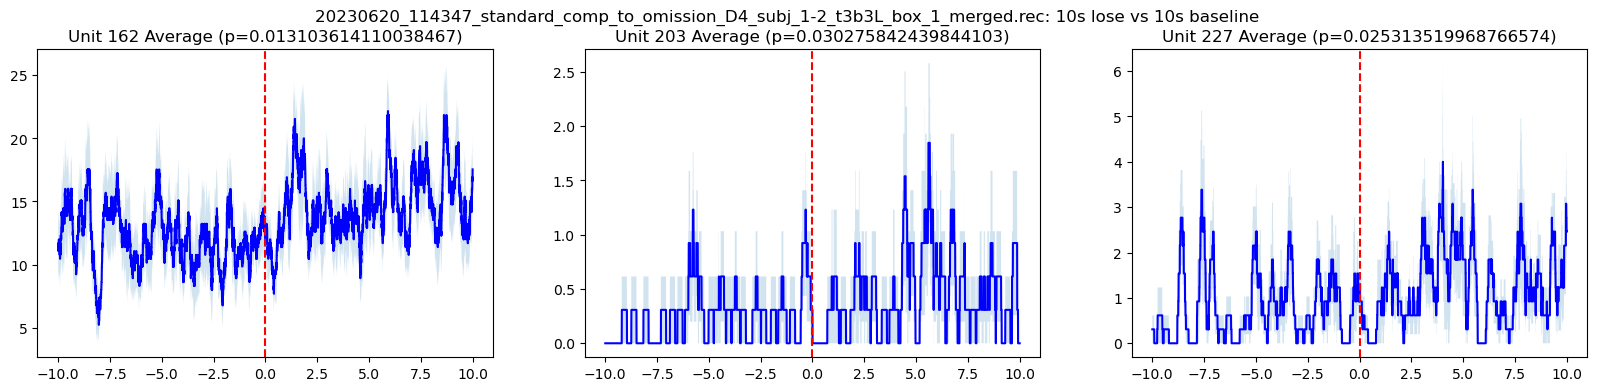

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20            4.0  0.172955  not significant   
1                 40            5.0  0.248864  not significant   
2                  7            5.0  0.248864  not significant   
3                  6            4.0  0.172955  not significant   
4                  8            8.0  0.600179  not significant   
..               ...            ...       ...              ...   
64               172           34.0  0.421011  not significant   
65               244           34.0  0.694887  not significant   
66               227           10.5  0.025314        increases   
67               226           32.0  0.345448  not significant   
68                50           36.0  0.506746  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
..                                                ...     ...   
64  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
65  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
66  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
67  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
68  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                       Event  
0   10s lose vs 10s baseline  
1   10s lose vs 10s baseline  
2   10s lose vs 10s baseline  
3   10s lose vs 10s baseline  
4   10s lose vs 10s baseline  
..                       ...  
64  10s lose vs 10s baseline  
65  10s lose vs 10s baseline  
66  10s lose vs 10s baseline  
67  10s lose vs 10s baseline  
68  10s lose vs 10s baseline  

[69 rows x 7 columns]

In [21]:
spikeanal2.wilcox_baseline_v_event_collection('lose', 10, 10)

In [24]:
for name, recording in rcecollection2.collection.items():
    print(name)
    print(recording.freq_dict)

20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged.rec
{20: 15.646665438007346, 40: 14.972949690707212, 7: 4.763221372483704, 6: 2.197232039490206, 8: 4.364478624318379, 14: 0.9786742010969732, 55: 1.723844648868332, 58: 0.6006660758362453, 48: 1.133067393186587, 38: 2.4779469341985942, 29: 4.471341680826686, 10: 2.272195676145287, 1: 0.9359289784936504, 64: 0.36907628770182466, 4: 0.17289485560448484, 3: 0.7273067726535524}
20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged.rec
{7: 2.701387619927728, 25: 2.4432609864887547, 38: 7.978378287830243, 4: 9.782284044842559, 42: 3.401250593732241, 48: 0.6223653702316116, 2: 0.6453165835974325, 30: 1.1389167048156073, 1: 2.4039160492902045, 18: 2.348177388258925, 9: 1.6411607895092208}
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
{89: 15.529008563935184, 64: 7.735833542719936, 94: 0.6641079397161429, 93: 0.3978796467021826, 60: 3.265831247159165, 90: 0.4792109274251287,

In [25]:
rcecollection3 = spike.EphysRecordingCollection(r'.\export\test_omission2')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged.rec
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
20230620_114347_standard_comp_to_omission_D4_subj_1-2_t3b3L_box_1_merged.rec
Please assign event dictionaries to each recording
as recording.event_dict
event_dict = {event name(str): np.array[[start(ms), stop(ms)]...]
Please assign subjects to each recording as recording.subject


In [26]:
for recording in rcecollection3.collection.keys():
    # Check if the recording key (without the .rec suffix) is in label_timestamps
    recording_key_without_suffix = recording[:-4]  # Remove '.rec' from the end
    if recording_key_without_suffix in label_timestamps:
        # Assign the corresponding label_timestamps dictionary to event_dict
        rcecollection3.collection[recording].event_dict = label_timestamps[recording_key_without_suffix]
        
        # Extract the subject from the recording key
        # Find the positions of 'subj_' and '_t' to extract the subject
        start = recording.find('subj_') + 5  # Start index after 'subj_'
        end = recording.find('_t', start)  # End index before '_t'
        subject = recording[start:end].replace('-', '_')  # Replace '-' with '_'
        
        # Assign the extracted subject
        rcecollection3.collection[recording].subject = subject

In [27]:
spikeanal3 = spike.SpikeAnalysis_MultiRecording(rcecollection3)

These recordings are missing event dictionaries:
['20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec']
These recordings are missing subjects: ['20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec']


In [28]:
label_timestamps.keys()

dict_keys(['20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged', '20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged', '20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged', '20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged', '20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged', '20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged', '20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged', '20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged', '20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged', '20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged', '20230618_100636_standard_comp_to_omission_D2_subj_1_1_t1b2L_box2_merged', '20230618_100636_standard_comp_to_omission_D2_subj_1_4_t4b3L_box1_merged', '20230620_114347_standard_comp_to_omission_D4_subj_1-1_t1b2L_box_2_merged', '20230620_114

In [29]:
label_timestamps = pickle.load(open('recording_to_label_to_timestamps 1.pkl', 'rb'))

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


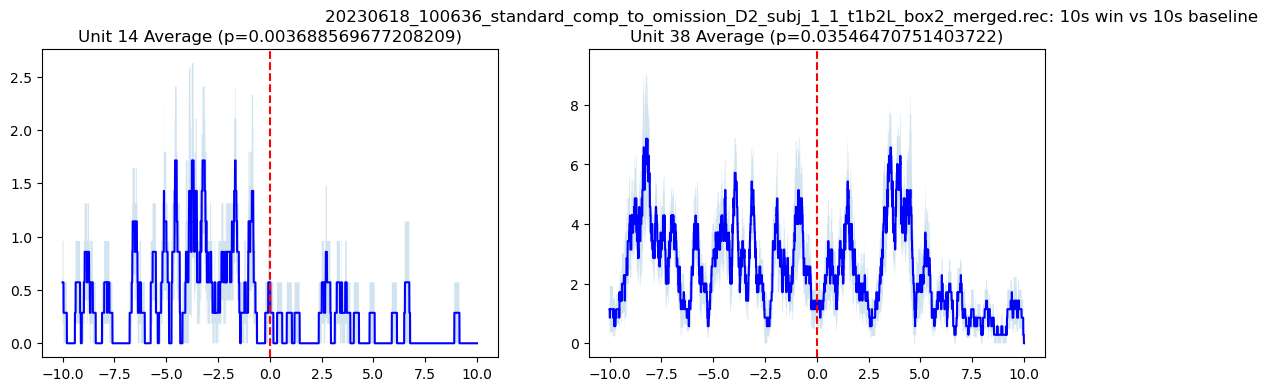

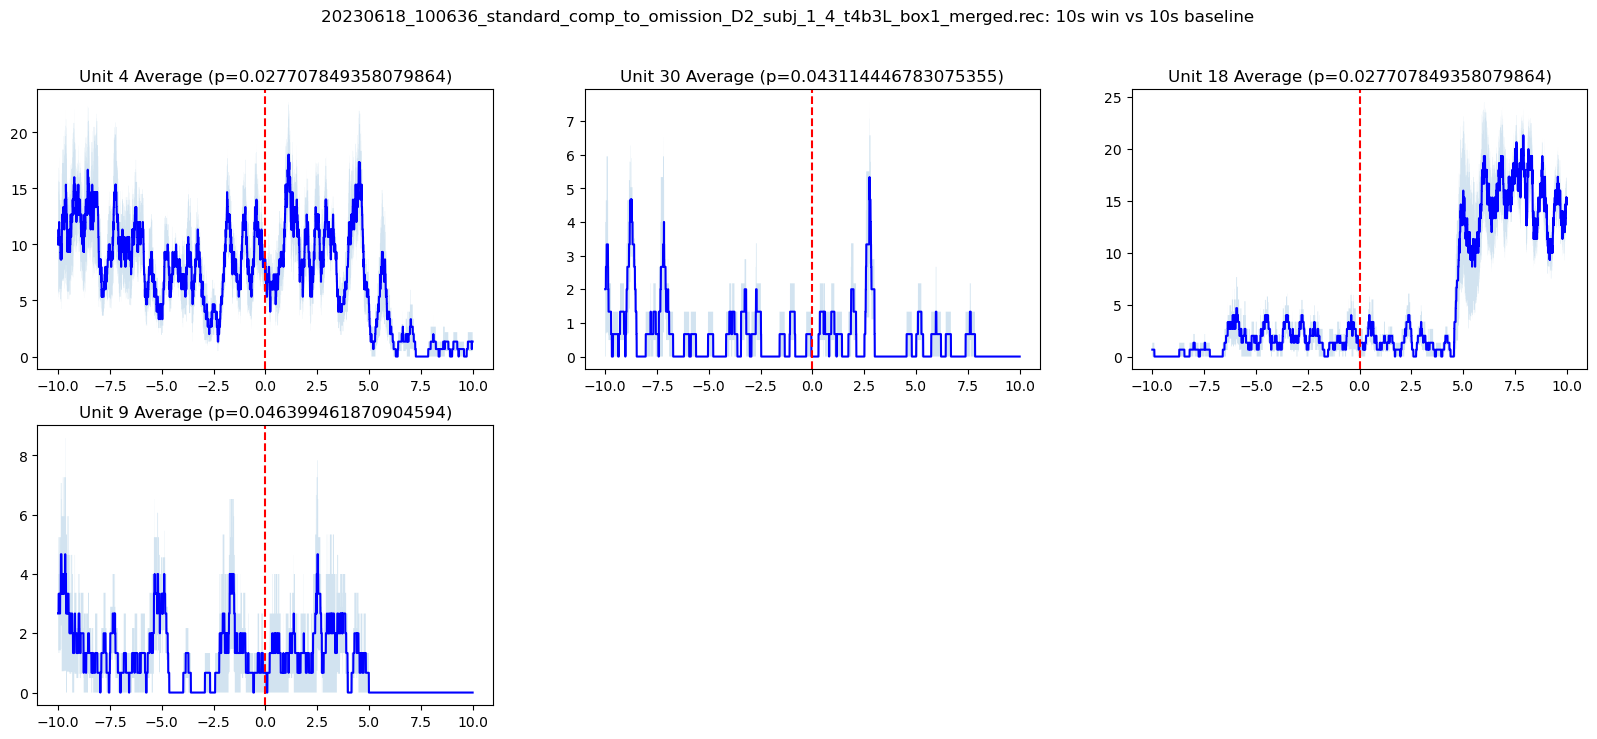

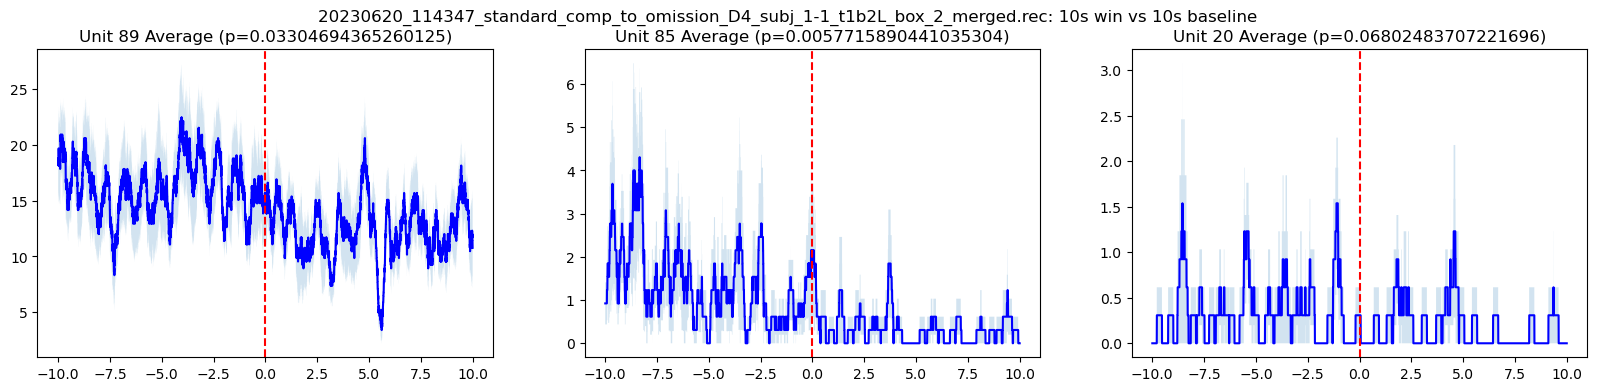

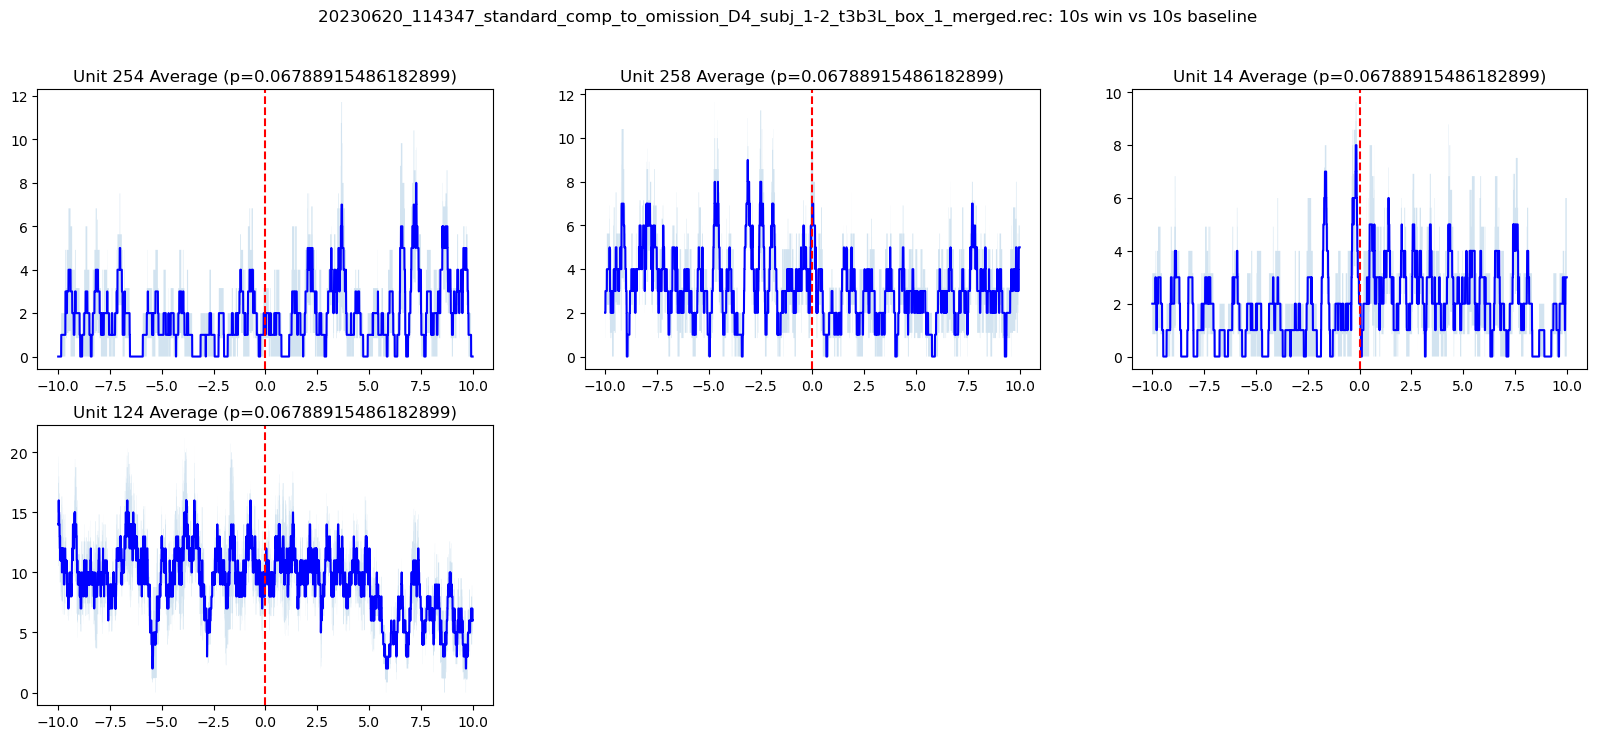

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20           43.0  0.550924  not significant   
1                 40           41.0  0.470338  not significant   
2                  7           35.0  0.271948  not significant   
3                  6           43.0  0.550924  not significant   
4                  8           43.0  0.550924  not significant   
..               ...            ...       ...              ...   
64               172            1.5  0.414216  not significant   
65               244            4.0  0.715001  not significant   
66               227            5.0  1.000000  not significant   
67               226            3.0  0.465209  not significant   
68                50            0.0  0.179712  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
..                                                ...     ...   
64  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
65  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
66  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
67  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
68  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                      Event  
0   10s win vs 10s baseline  
1   10s win vs 10s baseline  
2   10s win vs 10s baseline  
3   10s win vs 10s baseline  
4   10s win vs 10s baseline  
..                      ...  
64  10s win vs 10s baseline  
65  10s win vs 10s baseline  
66  10s win vs 10s baseline  
67  10s win vs 10s baseline  
68  10s win vs 10s baseline  

[69 rows x 7 columns]

In [31]:
spikeanal2.wilcox_baseline_v_event_collection('win', 10, 10, save=True)

In [34]:
master_df

NameError: name 'master_df' is not defined

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


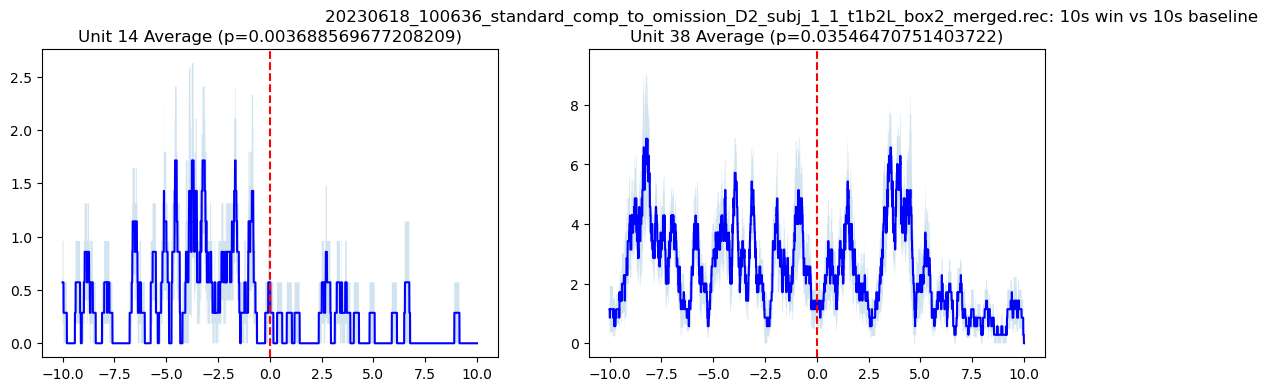

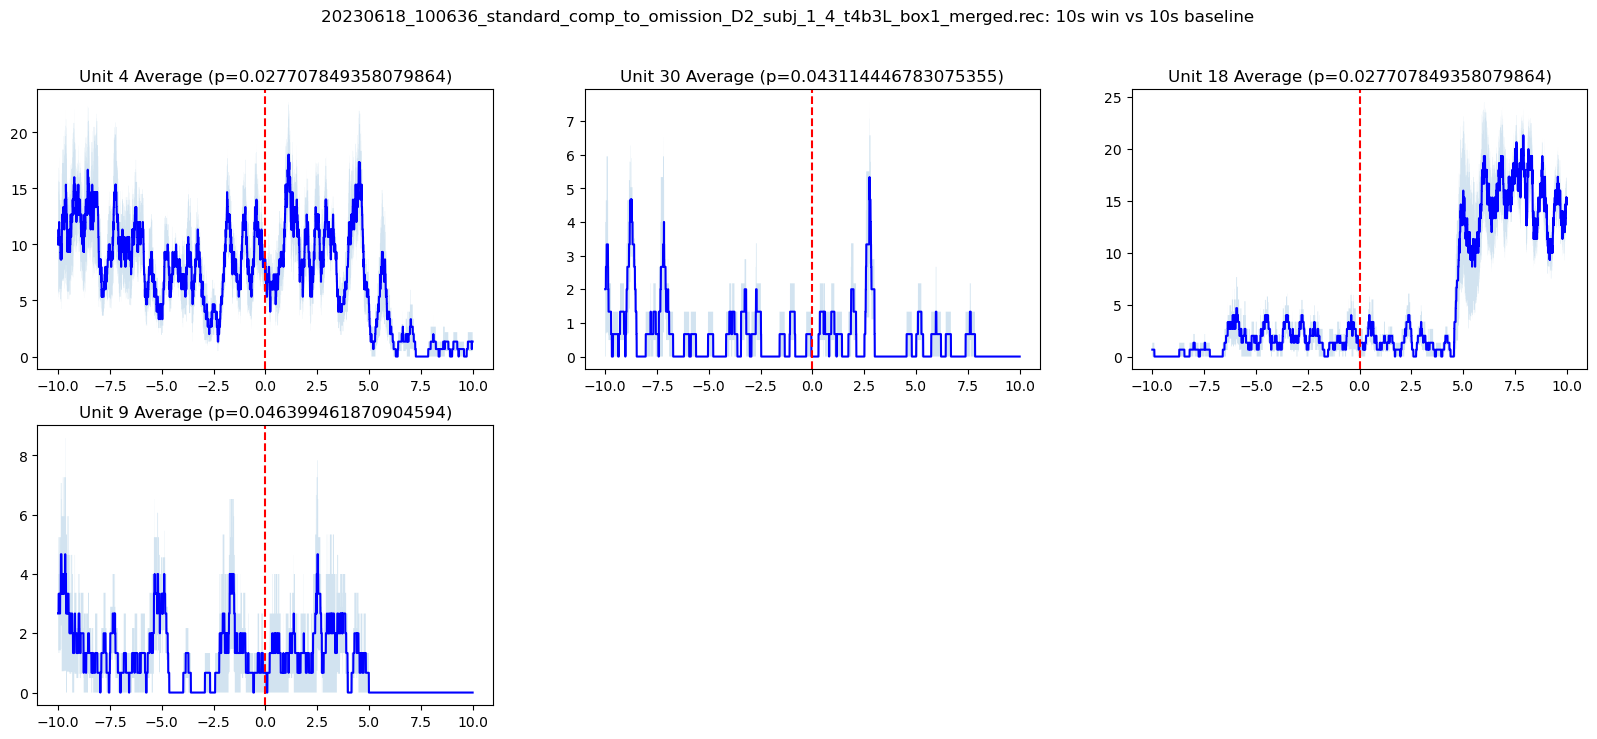

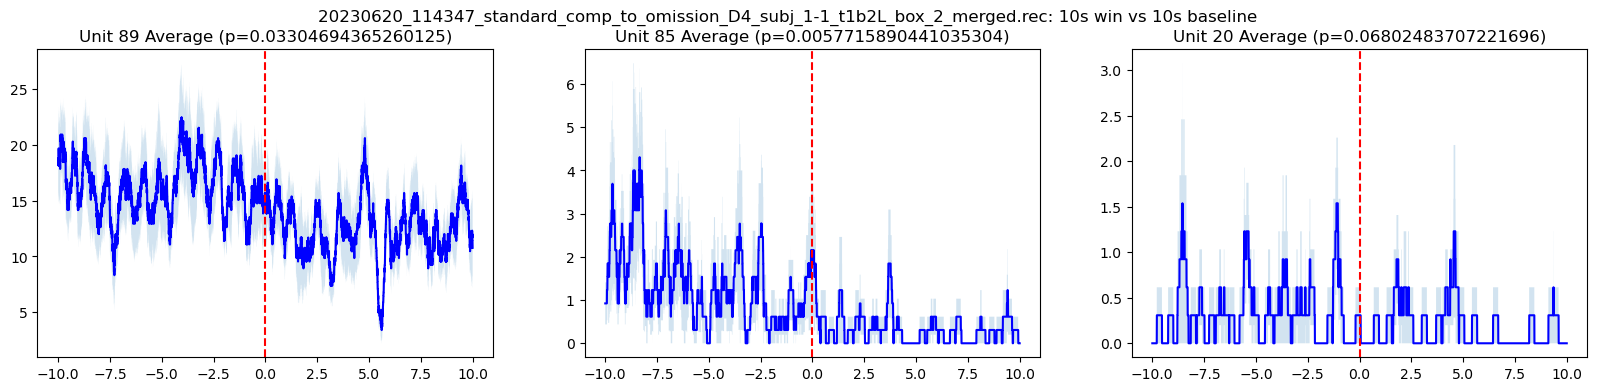

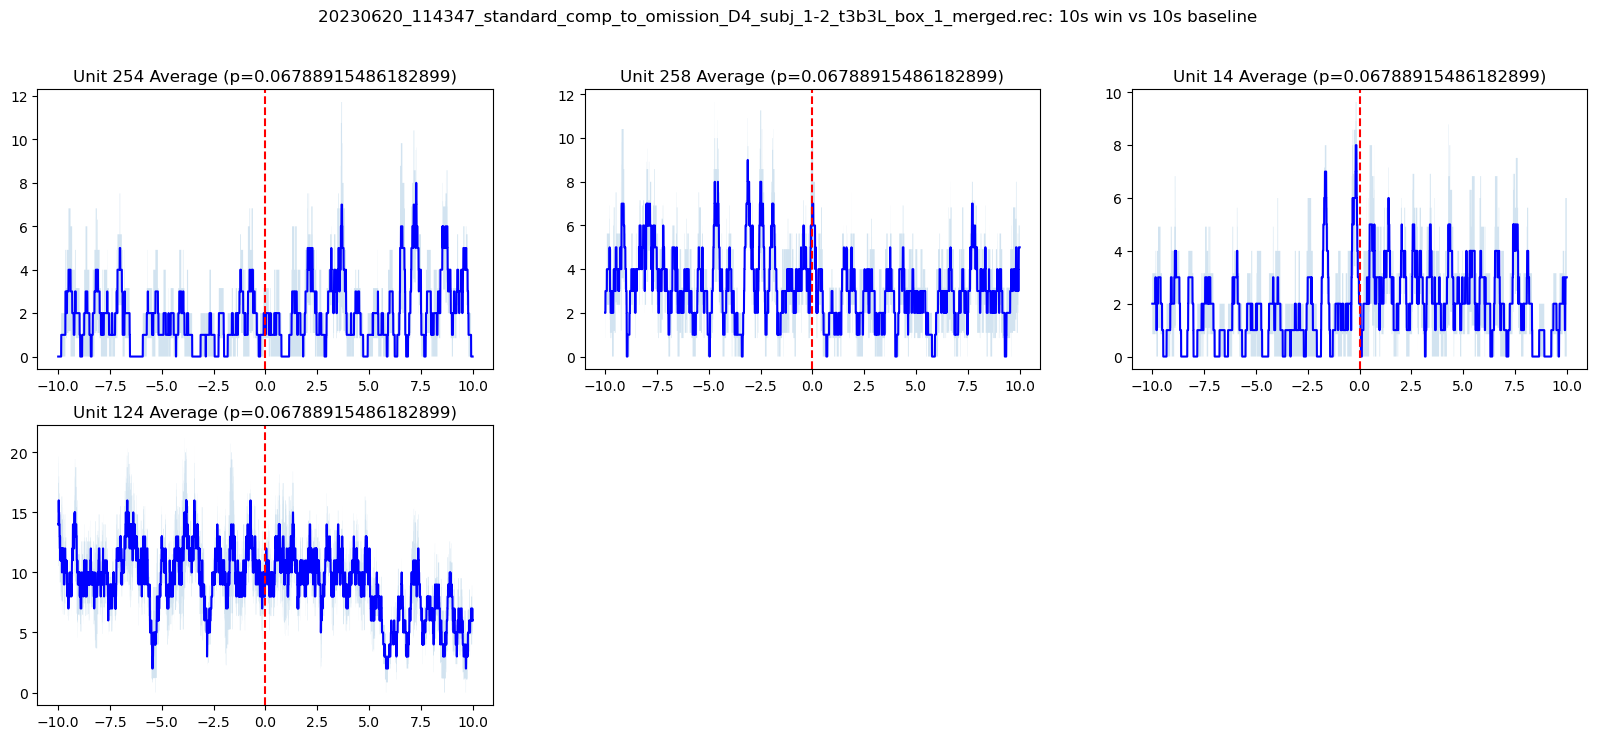

In [35]:
master_df = spikeanal2.wilcox_baseline_v_event_collection('win', 10, 10, save=True)

In [36]:
master_df

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20           43.0  0.550924  not significant   
1                 40           41.0  0.470338  not significant   
2                  7           35.0  0.271948  not significant   
3                  6           43.0  0.550924  not significant   
4                  8           43.0  0.550924  not significant   
..               ...            ...       ...              ...   
64               172            1.5  0.414216  not significant   
65               244            4.0  0.715001  not significant   
66               227            5.0  1.000000  not significant   
67               226            3.0  0.465209  not significant   
68                50            0.0  0.179712  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
..                                                ...     ...   
64  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
65  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
66  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
67  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
68  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                      Event  
0   10s win vs 10s baseline  
1   10s win vs 10s baseline  
2   10s win vs 10s baseline  
3   10s win vs 10s baseline  
4   10s win vs 10s baseline  
..                      ...  
64  10s win vs 10s baseline  
65  10s win vs 10s baseline  
66  10s win vs 10s baseline  
67  10s win vs 10s baseline  
68  10s win vs 10s baseline  

[69 rows x 7 columns]

In [37]:
del(master_df)

In [38]:
master_df

NameError: name 'master_df' is not defined

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


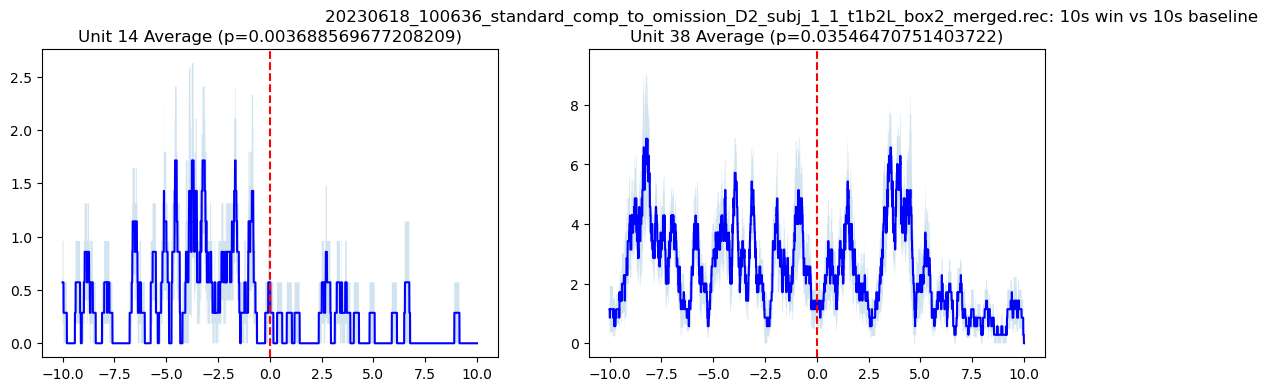

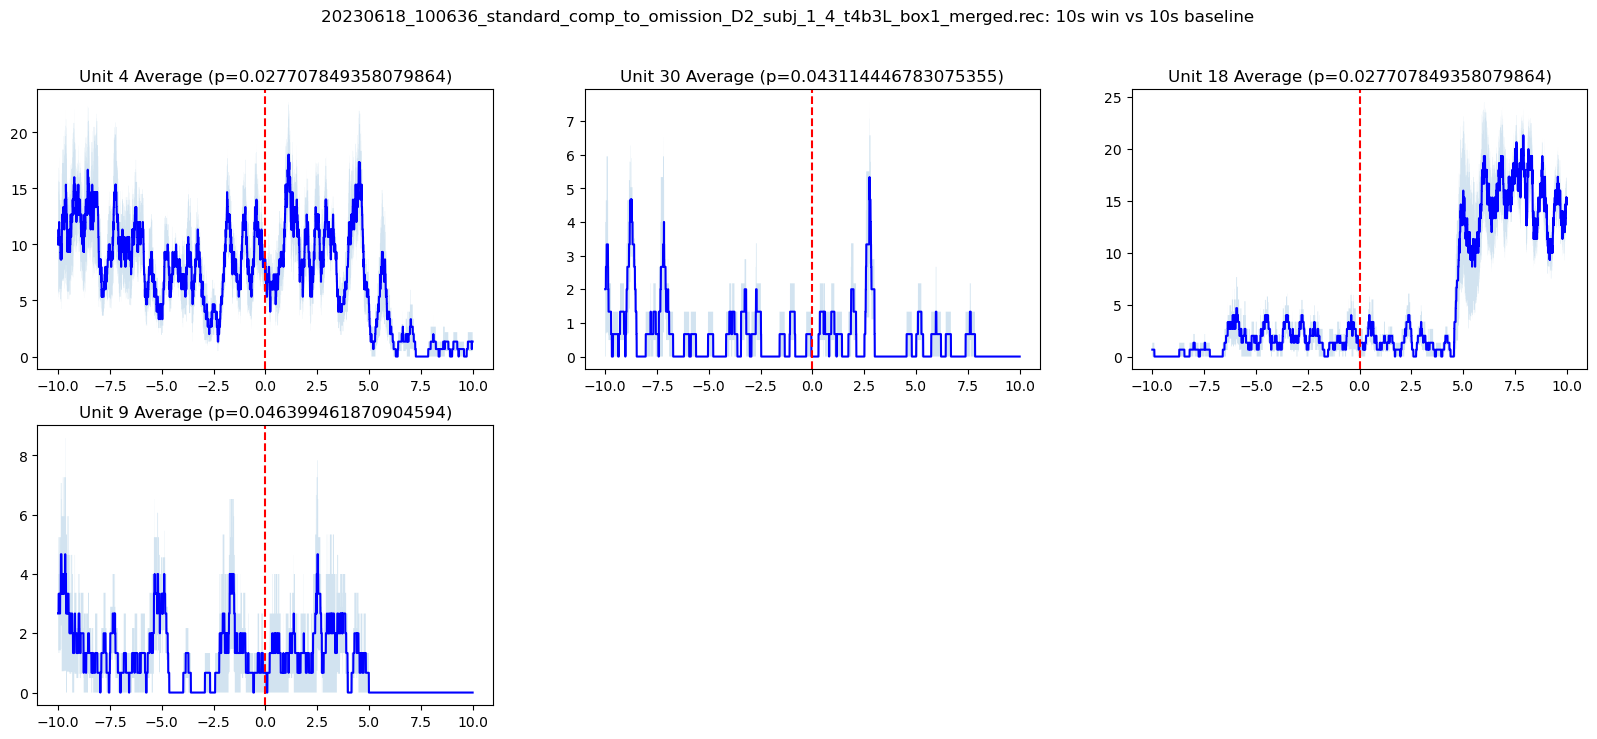

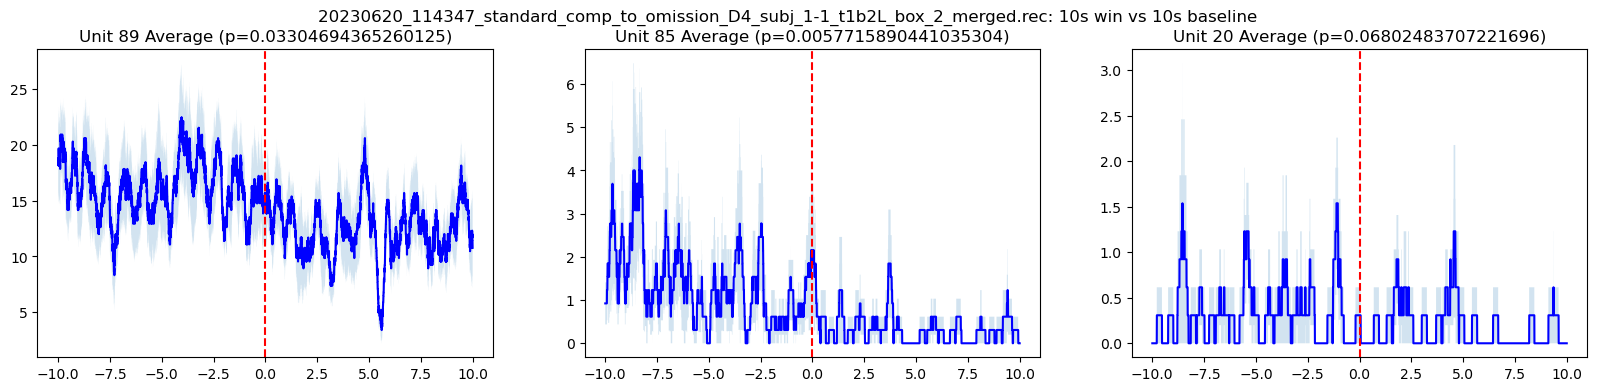

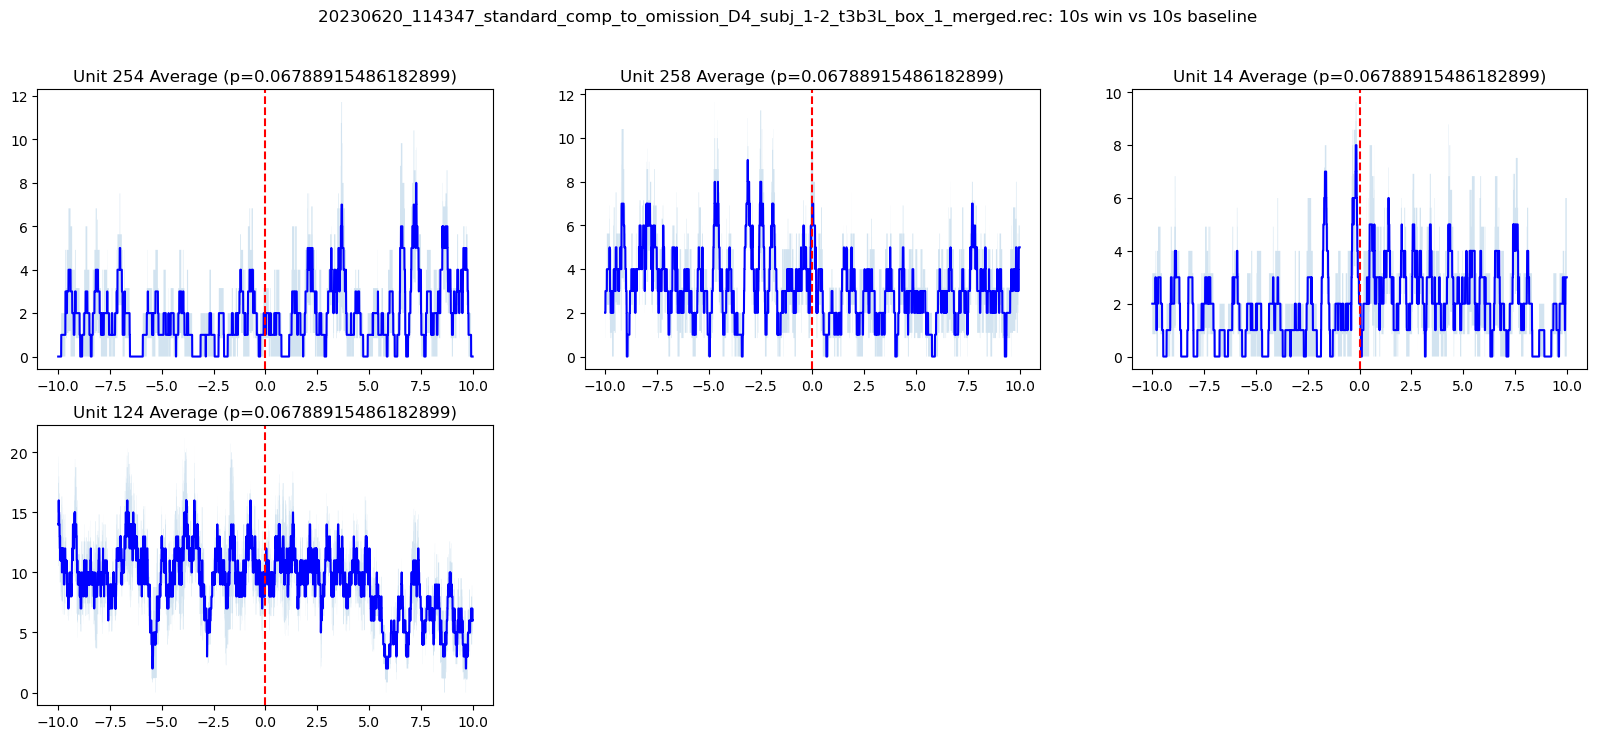

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20           43.0  0.550924  not significant   
1                 40           41.0  0.470338  not significant   
2                  7           35.0  0.271948  not significant   
3                  6           43.0  0.550924  not significant   
4                  8           43.0  0.550924  not significant   
..               ...            ...       ...              ...   
64               172            1.5  0.414216  not significant   
65               244            4.0  0.715001  not significant   
66               227            5.0  1.000000  not significant   
67               226            3.0  0.465209  not significant   
68                50            0.0  0.179712  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
..                                                ...     ...   
64  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
65  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
66  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
67  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
68  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                      Event  
0   10s win vs 10s baseline  
1   10s win vs 10s baseline  
2   10s win vs 10s baseline  
3   10s win vs 10s baseline  
4   10s win vs 10s baseline  
..                      ...  
64  10s win vs 10s baseline  
65  10s win vs 10s baseline  
66  10s win vs 10s baseline  
67  10s win vs 10s baseline  
68  10s win vs 10s baseline  

[69 rows x 7 columns]

In [39]:
spikeanal2.wilcox_baseline_v_event_collection('win', 10, 10, save=True)

In [40]:
master_df

NameError: name 'master_df' is not defined

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


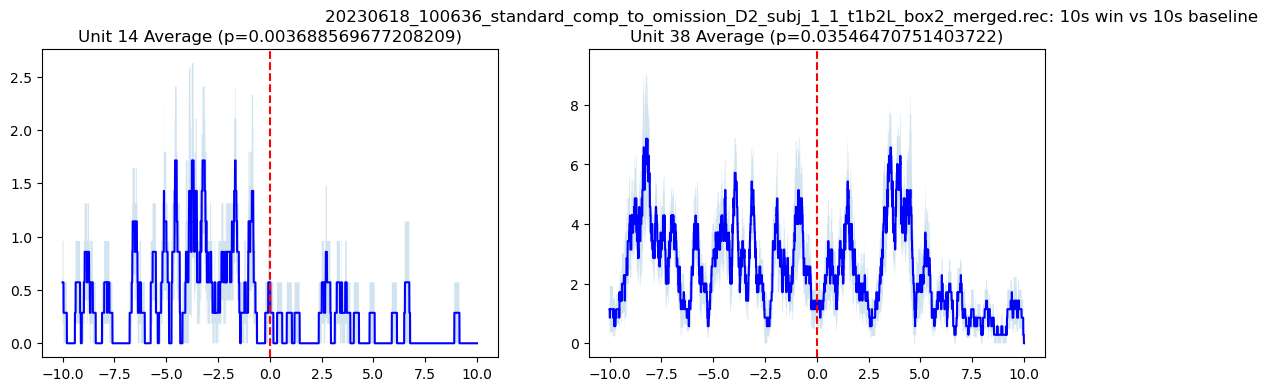

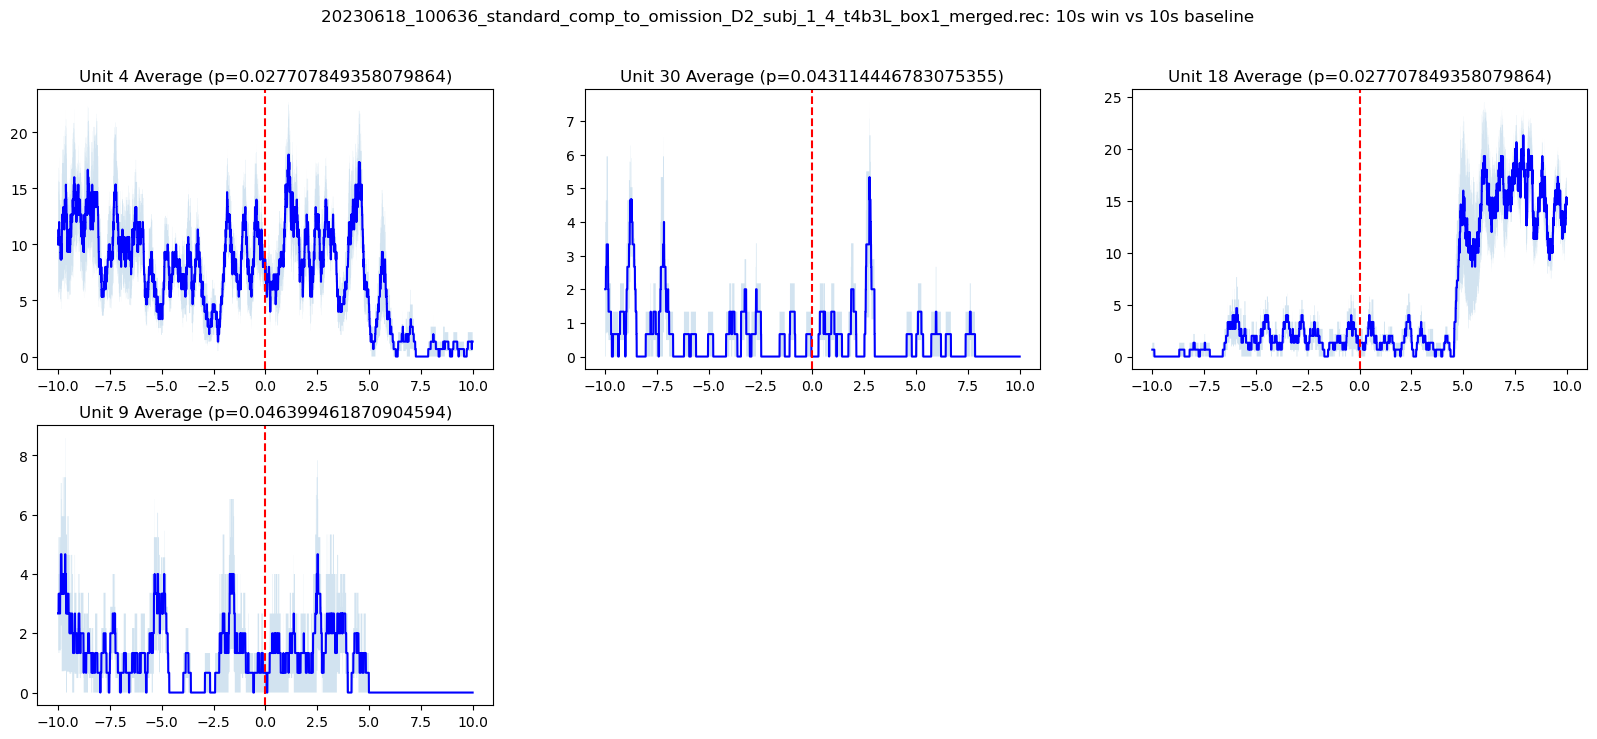

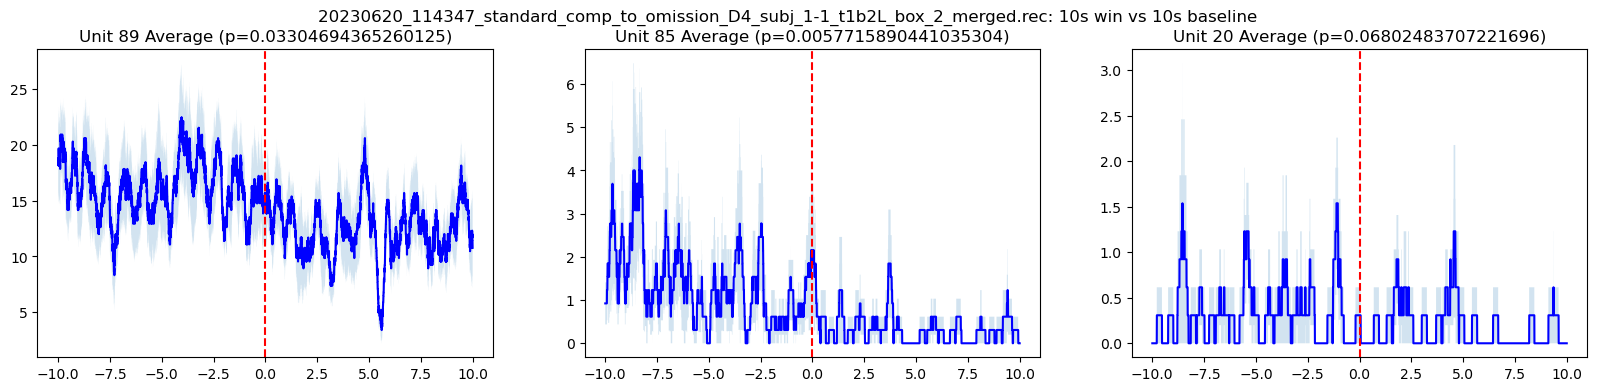

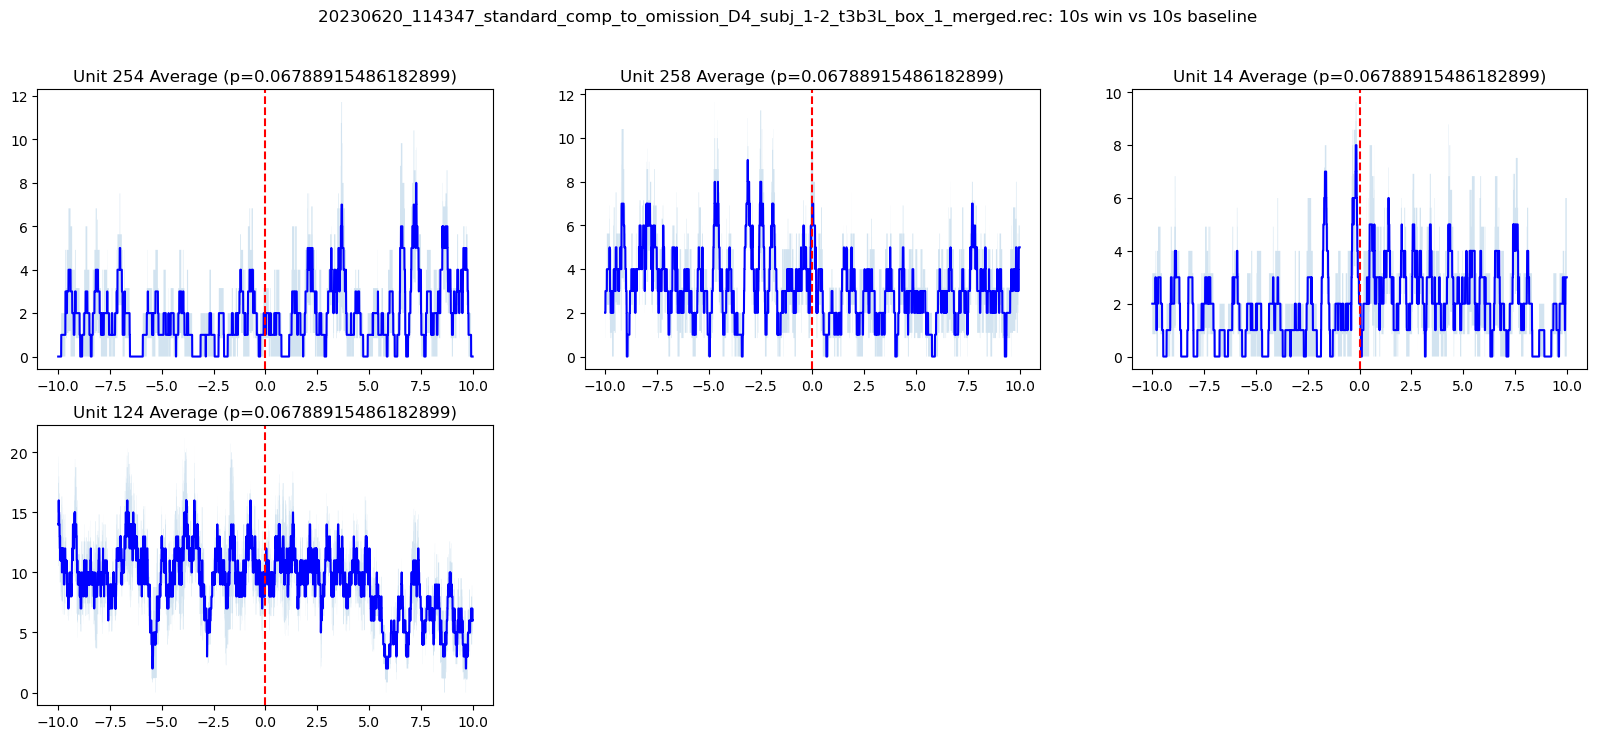

In [41]:
omission_wilcox_baseline_win = spikeanal2.wilcox_baseline_v_event_collection('win', 10, 10, save=True)

In [42]:
omission_wilcox_baseline_win

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20           43.0  0.550924  not significant   
1                 40           41.0  0.470338  not significant   
2                  7           35.0  0.271948  not significant   
3                  6           43.0  0.550924  not significant   
4                  8           43.0  0.550924  not significant   
..               ...            ...       ...              ...   
64               172            1.5  0.414216  not significant   
65               244            4.0  0.715001  not significant   
66               227            5.0  1.000000  not significant   
67               226            3.0  0.465209  not significant   
68                50            0.0  0.179712  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
..                                                ...     ...   
64  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
65  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
66  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
67  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
68  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                      Event  
0   10s win vs 10s baseline  
1   10s win vs 10s baseline  
2   10s win vs 10s baseline  
3   10s win vs 10s baseline  
4   10s win vs 10s baseline  
..                      ...  
64  10s win vs 10s baseline  
65  10s win vs 10s baseline  
66  10s win vs 10s baseline  
67  10s win vs 10s baseline  
68  10s win vs 10s baseline  

[69 rows x 7 columns]

C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\short\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


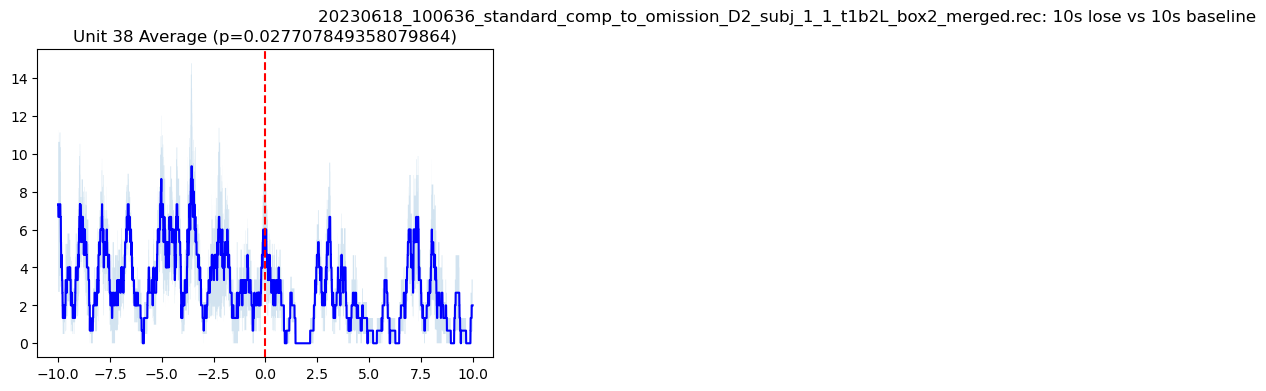

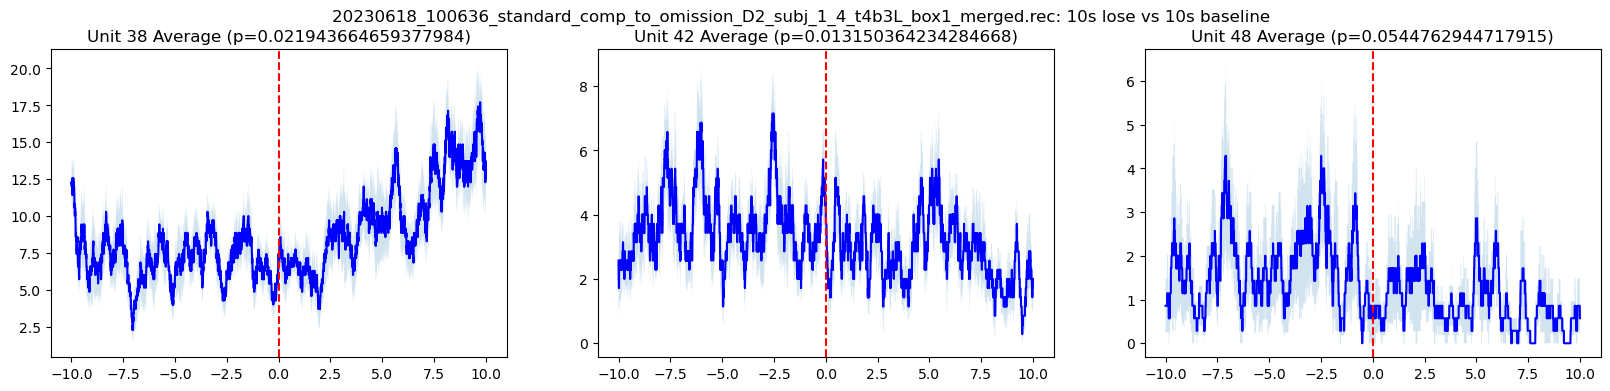

<Figure size 2000x0 with 0 Axes>

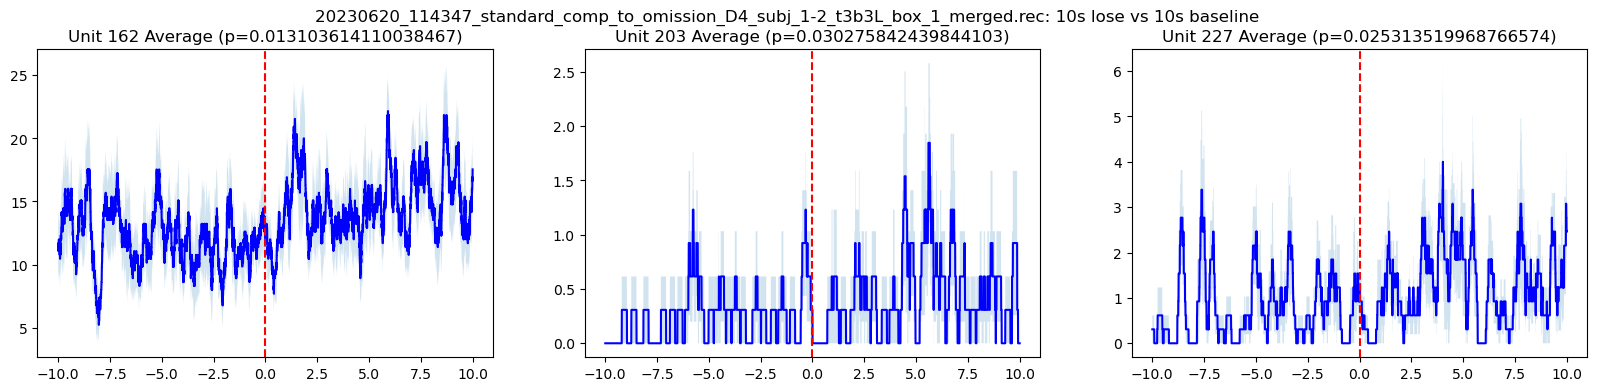

In [43]:
omission_wilcox_baseline_lose = spikeanal2.wilcox_baseline_v_event_collection('lose', 10, 10, save=True)

In [44]:
with open('omission_wilcox_baseline_lose.pkl', 'wb') as file:
    pickle.dump(omission_wilcox_baseline_lose, file)

with open('omission_wilcox_baseline_win.pkl', 'wb') as file:
    pickle.dump(omission_wilcox_baseline_win, file)

In [45]:
omission_wilcox_baseline_lose

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20            4.0  0.172955  not significant   
1                 40            5.0  0.248864  not significant   
2                  7            5.0  0.248864  not significant   
3                  6            4.0  0.172955  not significant   
4                  8            8.0  0.600179  not significant   
..               ...            ...       ...              ...   
64               172           34.0  0.421011  not significant   
65               244           34.0  0.694887  not significant   
66               227           10.5  0.025314        increases   
67               226           32.0  0.345448  not significant   
68                50           36.0  0.506746  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
3   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
..                                                ...     ...   
64  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
65  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
66  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
67  20230620_114347_standard_comp_to_omission_D4_s...     1_2   
68  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                       Event  
0   10s lose vs 10s baseline  
1   10s lose vs 10s baseline  
2   10s lose vs 10s baseline  
3   10s lose vs 10s baseline  
4   10s lose vs 10s baseline  
..                       ...  
64  10s lose vs 10s baseline  
65  10s lose vs 10s baseline  
66  10s lose vs 10s baseline  
67  10s lose vs 10s baseline  
68  10s lose vs 10s baseline  

[69 rows x 7 columns]

In [52]:
omis_s11_lose = omission_wilcox_baseline_lose[omission_wilcox_baseline_lose['Subject'] == '1_1']
omis_s11_win = omission_wilcox_baseline_win[omission_wilcox_baseline_win['Subject'] == '1_1']

# Combine the filtered DataFrames
omis_s_11 = pd.concat([omis_s11_lose, omis_s11_win], ignore_index=True)

In [48]:
omis_s_11

original unit id  Wilcoxon Stat   p value event1 vs event2  \
0                 20            4.0  0.172955  not significant   
1                 40            5.0  0.248864  not significant   
2                  7            5.0  0.248864  not significant   
3                  6            4.0  0.172955  not significant   
4                  8            8.0  0.600179  not significant   
5                 14            5.0  0.500184  not significant   
6                 55            5.0  0.248864  not significant   
7                 58           10.0  0.916512  not significant   
8                 48            5.0  0.500184  not significant   
9                 38            0.0  0.027708        decreases   
10                29            5.0  0.248864  not significant   
11                10            5.0  0.248864  not significant   
12                 1            7.0  0.463071  not significant   
13                64            0.0  0.179712  not significant   
14                 4            0.0  0.317311  not significant   
15                 3            0.0  0.179712  not significant   
16                89            3.0  0.465209  not significant   
17                64            3.0  0.465209  not significant   
18                94            2.0  0.273322  not significant   
19                93            3.0  1.000000  not significant   
20                60            1.0  0.144127  not significant   
21                90            3.0  0.465209  not significant   
22                22            0.0  0.108809  not significant   
23                57            4.0  0.715001  not significant   
24                85            5.0  1.000000  not significant   
25                20            1.0  0.140773  not significant   
26                 2            3.0  0.461451  not significant   
27                34            2.0  0.273322  not significant   
28                20           43.0  0.550924  not significant   
29                40           41.0  0.470338  not significant   
30                 7           35.0  0.271948  not significant   
31                 6           43.0  0.550924  not significant   
32                 8           43.0  0.550924  not significant   
33                14            2.0  0.003689        increases   
34                55           41.0  0.470338  not significant   
35                58           35.0  0.753684  not significant   
36                48           28.5  0.409937  not significant   
37                38           19.0  0.035465        increases   
38                29           37.0  0.330536  not significant   
39                10           39.0  0.396726  not significant   
40                 1           45.0  0.972125  not significant   
41                64            1.5  0.414216  not significant   
42                 4           16.0  0.779171  not significant   
43                 3           18.0  0.587322  not significant   
44                89           15.0  0.033047        increases   
45                64           23.0  0.115851  not significant   
46                94           30.0  0.789472  not significant   
47                93           33.0  0.636831  not significant   
48                60           32.0  0.345448  not significant   
49                90           24.5  0.449580  not significant   
50                22           28.5  0.233236  not significant   
51                57           26.0  0.172955  not significant   
52                85            6.0  0.005772        increases   
53                20           19.5  0.068025  not significant   
54                 2           23.5  0.223837  not significant   
55                34           18.0  0.592654  not significant   

                                            Recording Subject  \
0   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
1   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
2   20230618_100636_standard_comp_to_omission_

In [50]:
omis_s_11_sig = omis_s_11[omis_s_11['event1 vs event2'] != 'not significant']

In [51]:
omis_s_11_sig

original unit id  Wilcoxon Stat   p value event1 vs event2  \
9                 38            0.0  0.027708        decreases   
33                14            2.0  0.003689        increases   
37                38           19.0  0.035465        increases   
44                89           15.0  0.033047        increases   
52                85            6.0  0.005772        increases   

                                            Recording Subject  \
9   20230618_100636_standard_comp_to_omission_D2_s...     1_1   
33  20230618_100636_standard_comp_to_omission_D2_s...     1_1   
37  20230618_100636_standard_comp_to_omission_D2_s...     1_1   
44  20230620_114347_standard_comp_to_omission_D4_s...     1_1   
52  20230620_114347_standard_comp_to_omission_D4_s...     1_1   

                       Event  
9   10s lose vs 10s baseline  
33   10s win vs 10s baseline  
37   10s win vs 10s baseline  
44   10s win vs 10s baseline  
52   10s win vs 10s baseline

In [53]:
omis_s12_lose = omission_wilcox_baseline_lose[omission_wilcox_baseline_lose['Subject'] == '1_2']
omis_s12_win = omission_wilcox_baseline_win[omission_wilcox_baseline_win['Subject'] == '1_2']

# Combine the filtered DataFrames
omis_s_12 = pd.concat([omis_s12_lose, omis_s12_win], ignore_index=True)

omis_s_12_sig = omis_s_12[omis_s_12['event1 vs event2'] != 'not significant']

In [54]:
omis_s_12_sig

original unit id  Wilcoxon Stat   p value event1 vs event2  \
5                162           10.0  0.013104        increases   
6                203           11.5  0.030276        increases   
27               227           10.5  0.025314        increases   

                                            Recording Subject  \
5   20230620_114347_standard_comp_to_omission_D4_s...     1_2   
6   20230620_114347_standard_comp_to_omission_D4_s...     1_2   
27  20230620_114347_standard_comp_to_omission_D4_s...     1_2   

                       Event  
5   10s lose vs 10s baseline  
6   10s lose vs 10s baseline  
27  10s lose vs 10s baseline

In [55]:
omis_s14_lose = omission_wilcox_baseline_lose[omission_wilcox_baseline_lose['Subject'] == '1_4']
omis_s14_win = omission_wilcox_baseline_win[omission_wilcox_baseline_win['Subject'] == '1_4']

# Combine the filtered DataFrames
omis_s_14 = pd.concat([omis_s14_lose, omis_s14_win], ignore_index=True)

omis_s_14_sig = omis_s_14[omis_s_14['event1 vs event2'] != 'not significant']

In [56]:
omis_s_14_sig

original unit id  Wilcoxon Stat   p value event1 vs event2  \
2                 38           16.0  0.021944        increases   
4                 42           13.0  0.013150        increases   
14                 4            0.0  0.027708        decreases   
18                30            0.0  0.043114        decreases   
20                18            0.0  0.027708        decreases   
21                 9            1.0  0.046399        increases   

                                            Recording Subject  \
2   20230618_100636_standard_comp_to_omission_D2_s...     1_4   
4   20230618_100636_standard_comp_to_omission_D2_s...     1_4   
14  20230618_100636_standard_comp_to_omission_D2_s...     1_4   
18  20230618_100636_standard_comp_to_omission_D2_s...     1_4   
20  20230618_100636_standard_comp_to_omission_D2_s...     1_4   
21  20230618_100636_standard_comp_to_omission_D2_s...     1_4   

                       Event  
2   10s lose vs 10s baseline  
4   10s lose vs 10s baseline  
14   10s win vs 10s baseline  
18   10s win vs 10s baseline  
20   10s win vs 10s baseline  
21   10s win vs 10s baseline

In [57]:
omis_sigs = pd.concat([omis_s_11_sig, omis_s_12_sig, omis_s_14_sig])

In [59]:
omis_sigs.to_csv('omission_sig_units.csv', index=False)